This project is about interpretable and explainable machine learning

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('FIFA 2018 Statistics.csv')

In [3]:
data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [5]:
y=(data['Man of the Match']=="Yes")
feature_names=[i for i in data.columns if data[i].dtype in [np.int64]]
X=data[feature_names]

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_X,val_X,train_y,val_y=train_test_split(X,y, random_state=1)

In [9]:
tree_model=DecisionTreeClassifier(random_state=0,max_depth=5,min_samples_split=5).fit(train_X,train_y)

In [10]:
y_pred=tree_model.predict(val_X)

In [11]:
y_pred

array([False,  True,  True,  True,  True,  True,  True, False, False,
        True, False,  True, False, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False,  True,  True,  True, False])

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [13]:
#making confusion matrix
cm=confusion_matrix(val_y,y_pred)
print(cm)
accuracy_score(val_y,y_pred)

[[ 9  7]
 [ 6 10]]


0.59375

In [14]:
#Task 3

In [15]:
#Training random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [16]:
my_model=RandomForestClassifier(n_estimators=100,random_state=0).fit(train_X,train_y)

In [17]:
#Prediction using random forest
y_pred_rf=my_model.predict(val_X)

In [18]:
#making confusion matrix
cm=confusion_matrix(val_y,y_pred_rf)
print(cm)
accuracy_score(val_y,y_pred_rf)

[[10  6]
 [ 4 12]]


0.6875

In [19]:
#Using permutation Importance
from eli5.sklearn import PermutationImportance

/home/rhyme/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/rhyme/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [20]:
#Extracting feature importance for random forest
perm=PermutationImportance(my_model,random_state=1).fit(val_X,val_y)

In [23]:
import eli5
eli5.show_weights(perm,feature_names=val_X.columns.tolist())

Weight,Feature
0.1750 ± 0.0848,Goal Scored
0.0500 ± 0.0637,Distance Covered (Kms)
0.0437 ± 0.0637,Yellow Card
0.0187 ± 0.0500,Off-Target
0.0187 ± 0.0637,Free Kicks
0.0187 ± 0.0637,Fouls Committed
0.0125 ± 0.0637,Pass Accuracy %
0.0125 ± 0.0306,Blocked
0.0063 ± 0.0612,Saves
0.0063 ± 0.0250,Ball Possession %


In [24]:
#Extracting feature importance for decision tree
perm=PermutationImportance(tree_model,random_state=1).fit(val_X,val_y)
import eli5
eli5.show_weights(perm,feature_names=val_X.columns.tolist())


Weight,Feature
0.1437 ± 0.1159,Goal Scored
0.0312 ± 0.0395,On-Target
0.0187 ± 0.0306,Distance Covered (Kms)
0.0063 ± 0.0729,Off-Target
0 ± 0.0000,Red
0 ± 0.0000,Ball Possession %
0 ± 0.0000,Blocked
0 ± 0.0000,Offsides
0 ± 0.0000,Goals in PSO
0 ± 0.0000,Saves


In [25]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset,info_plots

In [33]:
feature_to_plot='Distance Covered (Kms)'

In [34]:
pdp_dist=pdp.pdp_isolate(model=tree_model,dataset=val_X,model_features=feature_names,feature=feature_to_plot)

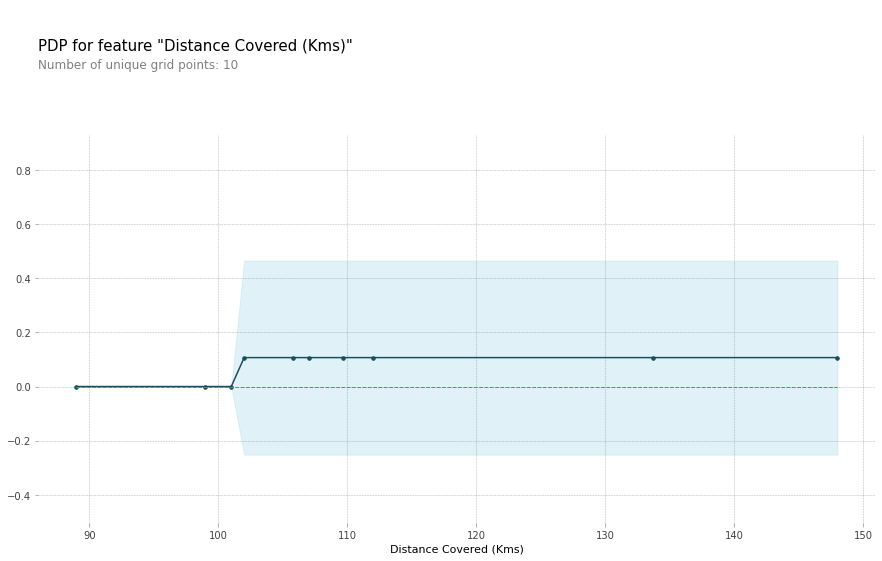

In [36]:
pdp.pdp_plot(pdp_dist,feature_to_plot)
plt.show()

In [40]:
#feature importance for decision tree
pdp_dist_rf=pdp.pdp_isolate(model=my_model,dataset=val_X,model_features=feature_names,feature=feature_to_plot)


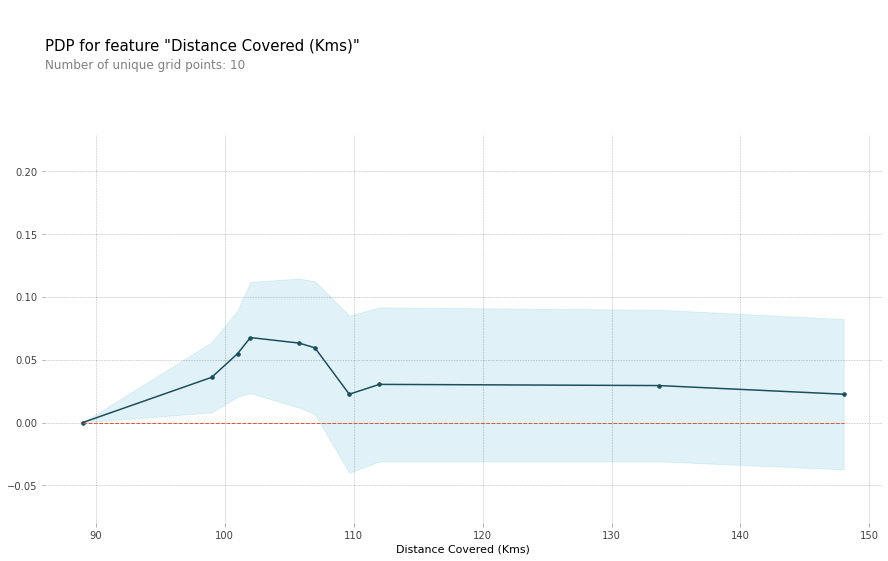

In [41]:
pdp.pdp_plot(pdp_dist_rf,feature_to_plot)
plt.show()